In [9]:
import numpy as np
import scipy.linalg
from scipy.io.wavfile import read
import matplotlib.pyplot as plt


In [10]:
def autocorr(seq, order=None):
    if order is None:
        order = len(seq) - 1
    autocor = []
    for tau in range(order + 1):
        s = np.sum([seq[n] * seq[n + tau] for n in range(len(seq) - tau)])
        autocor.append(s)
    return autocor


In [11]:
def lpc(seq, order=None):
    acseq = np.array(autocorr(seq, order))
    a_coef = np.dot(np.linalg.pinv(scipy.linalg.toeplitz(acseq[:-1])), -acseq[1:].T)
    err_term = acseq[0] + np.dot(acseq[1:], a_coef)
    return a_coef.tolist(), np.sqrt(abs(err_term))


In [12]:
def lpcc(seq, err_term, order=None):
    if order is None:
        order = len(seq) - 1
    lpcc_coeffs = [np.log(err_term), -seq[0]]
    for n in range(2, order + 1):
        upbound = order + 1 if n > order else n
        lpcc_coef = -sum(i * lpcc_coeffs[i] * seq[n - i - 1] for i in range(1, upbound)) / upbound
        if n <= len(seq):
            lpcc_coef -= seq[n - 1]
        lpcc_coeffs.append(lpcc_coef)
    return lpcc_coeffs


C:\Users\a074822\AppData\Local\Temp\ipykernel_44592\3095067319.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, wav = read(filename)
C:\Users\a074822\AppData\Local\Temp\ipykernel_44592\3544096332.py:6: RuntimeWarning: overflow encountered in scalar multiply
  s = np.sum([seq[n] * seq[n + tau] for n in range(len(seq) - tau)])


[9.049558083406183, 0.7194184708227038, 0.26567687238499005, 0.3503897677175457, 0.042354265525245405, 0.09301709603365338, 0.15076122445184048, -0.05510825205684887, 0.20003120919905976, -0.05931065514640366, 0.303210845210128, -0.138366682026903, 0.06818249441260182]


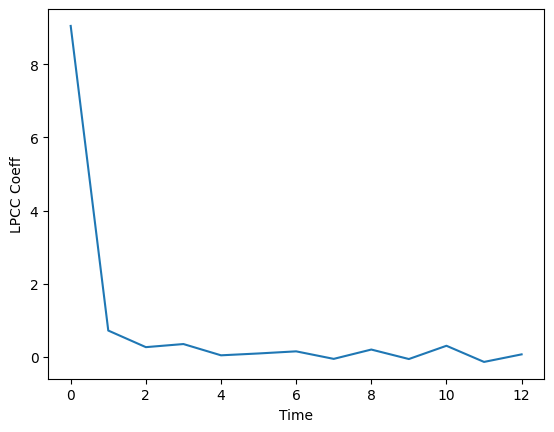

In [13]:
from setuptools import glob

order = 12
for count, filename in enumerate(glob.glob('FMP_C2_F10.wav')):
    sr, wav = read(filename)
    lpc_value, err = lpc(wav, order)
    lpcc_value = lpcc(lpc_value, err, order)

    print(lpcc_value)

    plt.figure(count)
    plt.xlabel("Time")
    plt.ylabel("LPCC Coeff")
    plt.plot(lpcc_value)
    plt.show()
